In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
jb = pd.read_csv(r"C:\Tweeter project\Election dataset\jb_1_en_sent3.csv")

In [4]:
dt = pd.read_csv(r"C:\Tweeter project\Election dataset\dt_1_lang_sent3.csv",engine='python')

In [2]:
dt.columns

NameError: name 'dt' is not defined

In [3]:
jb.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'collected_at', 'emojis',
       'cleaned_tweet', 'language', 'sentiment_vader', 'sentiment_TextBlob',
       'sentiment_Transformers'],
      dtype='object')

- ### Next dropp not necessaries columns and nan values

In [66]:
dt.shape

(445680, 18)

In [67]:
jb.shape

(355282, 20)

In [5]:
total_nan = jb.isna().sum().sum()
print(f"Total number of NaN values: {total_nan}")

Total number of NaN values: 651641


In [6]:
total_nan = dt.isna().sum().sum()
print(f"Total number of NaN values: {total_nan}")

Total number of NaN values: 384188


In [8]:
jb.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'emojis', 'cleaned_tweet',
       'language', 'sentiment_vader'],
      dtype='object')

In [11]:
dt.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'user_location_cleaned', 'emojis',
       'cleaned_tweet', 'language'],
      dtype='object')

In [7]:
drop_column = ['collected_at','sentiment_Transformers','sentiment_TextBlob']

jb = jb.drop(columns=drop_column)

In [10]:
dt_drop_column = ['collected_at']

dt = dt.drop(columns=dt_drop_column)

In [15]:
nan_per_column = jb.isna().sum()
print(nan_per_column)

created_at                   0
tweet                        0
likes                        0
retweet_count                0
user_screen_name             0
user_join_date               0
user_followers_count         0
user_location                0
lat                          0
long                         0
city                         0
country                      0
state                        0
emojis                  298355
cleaned_tweet                0
language                     0
sentiment_vader              0
dtype: int64


In [17]:
nan_per_dt = dt.isna().sum()
print(nan_per_dt)

created_at                    0
tweet                         0
likes                         0
retweet_count                 0
user_screen_name              0
user_join_date                0
user_followers_count          0
user_location                 0
lat                           0
long                          0
city                          0
country                       0
state                         0
user_location_cleaned         0
emojis                   384152
cleaned_tweet                 0
language                      0
dtype: int64


In [76]:
# List of columns to check for NaN values
columns_to_check = ['lat',
       'long', 'city', 'country', 'state',]

# Drop rows where all values in the listed columns are NaN
jb = jb.dropna(subset=columns_to_check, how='all')

In [14]:
jb = jb.dropna(subset=['language'])


In [16]:
dt = dt.dropna(subset=['user_location_cleaned', 'cleaned_tweet','language'])


In [18]:
jb[['city', 'country', 'state']] = jb[['city', 'country', 'state']].fillna('Unknown')


In [19]:
jb.loc[jb["country"] == "United States", "country"] = "United States of America"

In [20]:
dt.loc[dt["country"] == "United States", "country"] = "United States of America"

In [21]:
jb.shape

(355280, 17)

In [22]:
dt.shape

(445680, 17)

In [23]:
# select only english
dt_Eng = dt[dt['language'] == "en"]

# top 5 country in english tweet 
top_5_countries = dt_Eng['country'].value_counts().head(5).index

# Step 3: Filter the DataFrame to include only tweets from those top 5 countries
dt_Eng_top5 = dt_Eng[dt_Eng['country'].isin(top_5_countries)]


In [24]:
# select only english
jb_Eng = jb[jb['language'] == "en"]

# top 5 country in english tweet 
top_5_countries = jb_Eng['country'].value_counts().head(5).index

# Step 3: Filter the DataFrame to include only tweets from those top 5 countries
jb_Eng_top5 = jb_Eng[jb_Eng['country'].isin(top_5_countries)]

In [18]:
dt_Eng_top5.sample(3)

,created_at,tweet,likes,retweet_count,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,state,user_location_cleaned,emojis,cleaned_tweet,language
325862,2020-11-05,Covid-19 attacks freedom \nhttps://t.co/Dk1SpU...,0.0,0.0,CARRIEGAGA123,2015-07-21,2215.0,Canada,61.066692,-107.991707,Unknown,Canada,Unknown,canada,NaN,covid attacks freedom freedomofspeech covid pr...,en
259994,2020-11-04,AND IT'S OFFICIAL: @POTUS Donald Trump has won...,24.0,5.0,WLKY,2009-03-05,126667.0,"Louisville, KY",38.254238,-85.759407,Louisville,United States of America,Kentucky,"louisville, ky",NaN,and its official donald trump has won kentucky...,en
369253,2020-11-06,Not wrong unless someone’s brave enough to las...,0.0,0.0,KatzST,2009-09-25,1080.0,"Seattle, WA",47.603832,-122.330062,Seattle,United States of America,Washington,"seattle, wa",NaN,not wrong unless someones brave enough to lass...,en


In [25]:
jb_Eng_top5.shape

(191770, 17)

In [26]:
dt_Eng_top5.shape

(257982, 17)

=============================================================================
- ### Next cleaning Date format and non numeric Vaues

In [71]:
jb_Eng_top5.dtypes

created_at                datetime64[ns]
tweet                             object
likes                            float64
retweet_count                    float64
user_screen_name                  object
user_join_date                    object
user_followers_count             float64
user_location                     object
lat                              float64
long                             float64
city                              object
country                           object
state                             object
collected_at                      object
emojis                            object
cleaned_tweet                     object
language                          object
sentiment_vader                  float64
sentiment_TextBlob               float64
sentiment_Transformers           float64
dtype: object

In [20]:
dt_Eng_top5.dtypes

created_at                object
tweet                     object
likes                    float64
retweet_count            float64
user_screen_name          object
user_join_date            object
user_followers_count     float64
user_location             object
lat                      float64
long                     float64
city                      object
country                   object
state                     object
user_location_cleaned     object
emojis                    object
cleaned_tweet             object
language                  object
dtype: object

In [27]:
# convert datetime created_at

jb_Eng_top5['created_at'] = pd.to_datetime(jb['created_at'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\828654492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5['created_at'] = pd.to_datetime(jb['created_at'],errors='coerce')


In [28]:
dt_Eng_top5['created_at'] = pd.to_datetime(dt['created_at'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1247798576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Eng_top5['created_at'] = pd.to_datetime(dt['created_at'],errors='coerce')


In [29]:
# convert datetime user_join_date

jb_Eng_top5['user_join_date'] = pd.to_datetime(jb_Eng_top5['user_join_date'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\2178697293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5['user_join_date'] = pd.to_datetime(jb_Eng_top5['user_join_date'],errors='coerce')


In [30]:
dt_Eng_top5['user_join_date'] = pd.to_datetime(dt_Eng_top5['user_join_date'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\2932701268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Eng_top5['user_join_date'] = pd.to_datetime(dt_Eng_top5['user_join_date'],errors='coerce')


In [31]:
dt_Eng_top5.dtypes

created_at               datetime64[ns]
tweet                            object
likes                           float64
retweet_count                   float64
user_screen_name                 object
user_join_date           datetime64[ns]
user_followers_count            float64
user_location                    object
lat                             float64
long                            float64
city                             object
country                          object
state                            object
user_location_cleaned            object
emojis                           object
cleaned_tweet                    object
language                         object
dtype: object

=============================================================================

- Next convert likes,user_followers_count , Lat, long to numercal values 

In [32]:
# convert formates to numeric nalues 

jb_Eng_top5["user_followers_count"] =pd.to_numeric(jb_Eng_top5["user_followers_count"],errors='coerce')
jb_Eng_top5['likes'] = pd.to_numeric(jb_Eng_top5['likes'], errors='coerce')
jb_Eng_top5['lat'] = pd.to_numeric(jb_Eng_top5['lat'], errors='coerce')
jb_Eng_top5['long'] = pd.to_numeric(jb_Eng_top5['long'], errors='coerce')


C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1862541133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5["user_followers_count"] =pd.to_numeric(jb_Eng_top5["user_followers_count"],errors='coerce')
C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1862541133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5['likes'] = pd.to_numeric(jb_Eng_top5['likes'], errors='coerce')
C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1862541133.py:5: SettingWithCopyWarning: 
A value is try

In [33]:
# convert formates to numeric nalues 

dt_Eng_top5["user_followers_count"] =pd.to_numeric(dt_Eng_top5["user_followers_count"],errors='coerce')
dt_Eng_top5['likes'] = pd.to_numeric(dt_Eng_top5['likes'], errors='coerce')
dt_Eng_top5['lat'] = pd.to_numeric(dt_Eng_top5['lat'], errors='coerce')
dt_Eng_top5['long'] = pd.to_numeric(dt_Eng_top5['long'], errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1882301162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Eng_top5["user_followers_count"] =pd.to_numeric(dt_Eng_top5["user_followers_count"],errors='coerce')
C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1882301162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Eng_top5['likes'] = pd.to_numeric(dt_Eng_top5['likes'], errors='coerce')
C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1882301162.py:5: SettingWithCopyWarning: 
A value is try

In [34]:
dt_Eng_top5.dtypes

created_at               datetime64[ns]
tweet                            object
likes                           float64
retweet_count                   float64
user_screen_name                 object
user_join_date           datetime64[ns]
user_followers_count            float64
user_location                    object
lat                             float64
long                            float64
city                             object
country                          object
state                            object
user_location_cleaned            object
emojis                           object
cleaned_tweet                    object
language                         object
dtype: object

In [35]:
top_10_followers = jb_Eng_top5['user_followers_count'].nlargest(10)
print(top_10_followers)

325957    13940930.0
324685    13940739.0
325147    13940738.0
325386    13940738.0
325598    13940738.0
325824    13940737.0
325872    13940737.0
326088    13940737.0
326306    13940737.0
328022    13940736.0
Name: user_followers_count, dtype: float64


In [57]:
dt_top_10_followers = dt_Eng_top5['user_followers_count'].nlargest(10)
print(dt_top_10_followers)

385307    13933195.0
275676    13919941.0
261898    13919823.0
267619    13919823.0
271250    13919821.0
271507    13919821.0
273624    13919821.0
286444    13919816.0
422940    13216027.0
241147    13205990.0
Name: user_followers_count, dtype: float64


==========================================================================================


- ###  Next Cleaning text and detected anguages

In [208]:
import re

# Regular expression to match emojis and visual symbols
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F700-\U0001F77F"  # alchemical symbols
    u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    u"\U0001FA00-\U0001FA6F"  # Chess Symbols
    u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "]+", flags=re.UNICODE)

# Function to extract emojis
def extract_emojis(text):
    return " ".join(emoji_pattern.findall(text))

# Function to remove emojis
def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

# Create new column with extracted emojis
jb['emojis'] = jb['tweet'].apply(lambda x: extract_emojis(str(x)))

# Remove emojis from 'cleaned_tweet' column
jb['cleaned_tweet'] = jb['tweet'].apply(lambda x: remove_emojis(str(x)))

# Display the updated DataFrame
print(jb[['cleaned_tweet', 'emojis']])

                                             cleaned_tweet emojis
0        #Elecciones2020 | En #Florida: #JoeBiden dice ...      🌐
2        @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...       
4        #censorship #HunterBiden #Biden #BidenEmails #...       
6        In 2020, #NYPost is being #censorship #CENSORE...       
11       FBI Allegedly Obtained Hunter Biden Computer, ...       
...                                                    ...    ...
1059898  @elnuevoherald @ngameztorres LOS MEDIOS A LA F...       
1059899  Mr. #Biden, tear down that wall (with #Mexico)...       
1059902  @elnuevoherald LOS MEDIOS A LA FUERZA QUIEREN ...       
1059904  Stop laying @CNN !\n#Paris and #London dont gi...      😂
1059906  L'OTAN va sortir de sa léthargie et redevenir ...       

[355282 rows x 2 columns]


In [209]:
# Remove URLs \
# Remove mentions (@username) \
# Remove hashtags but keep the words \
# Replace HTML entities like &amp; \
# Remove newlines and tabs \
# Remove punctuation \
# Convert to lowercase \
# Normalize contractions \
# Remove extra whitespace \
# Strip leading/trailing whitespace

jb['cleaned_tweet'] = jb['cleaned_tweet'].fillna('') \
    .replace(r'http\S+|www\S+|https\S+', '', regex=True) \
    .replace(r'@\w+', '', regex=True) \
    .replace(r'#(\w+)', r'\1', regex=True) \
    .replace('&amp;', 'and', regex=False) \
    .replace(r'[\n\t]+', ' ', regex=True) \
    .replace(r'[^\w\s]', '', regex=True) \
    .str.lower() \
    .replace(r"\bim\b", "i am", regex=True) \
    .replace(r"\bi'm\b", "i am", regex=True) \
    .replace(r'\s+', ' ', regex=True) \
    .str.strip()



In [ ]:
# Remove non-alphabetic characters (keeping spaces)
jb['cleaned_tweet'] = jb['cleaned_tweet'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Check again to confirm non-alphabetic characters are removed
non_alpha_count = jb['cleaned_tweet'].str.contains(r'[^a-zA-Z\s]').sum()
print(non_alpha_count) 

In [79]:
# Find tweets with non-alphabetic characters (except spaces)
jb_Eng_top5['cleaned_tweet'].str.contains(r'[^a-zA-Z\s]').sum()


0

In [36]:
jb_Eng_top5.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'emojis', 'cleaned_tweet',
       'language', 'sentiment_vader'],
      dtype='object')

In [37]:
jb_Eng_top5["country"].unique()

array(['United States of America', 'United Kingdom', 'Canada',
       'Australia', 'India'], dtype=object)

In [38]:
dt_Eng_top5["country"].unique()

array(['United States of America', 'United Kingdom', 'Australia',
       'Canada', 'India'], dtype=object)

In [39]:
dt_Eng_top5["country"].value_counts()

country
United States of America    189425
United Kingdom               31392
Canada                       14880
India                        13613
Australia                     8672
Name: count, dtype: int64

In [227]:
from langdetect import detect

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return None  # Return None if detection fails

# Detect the language of each tweet and store it in a new column
jb['language'] = jb['cleaned_tweet'].apply(detect_language)

In [40]:

#fill nan values in emojies with empty
jb_Eng_top5['emojis'].fillna('', inplace=True)

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1844029267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5['emojis'].fillna('', inplace=True)


In [41]:
dt_Eng_top5['emojis'].fillna('', inplace=True)

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\976023943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Eng_top5['emojis'].fillna('', inplace=True)


In [42]:
dt_Eng_top5.isna().sum()

created_at               0
tweet                    0
likes                    0
retweet_count            0
user_screen_name         0
user_join_date           0
user_followers_count     0
user_location            0
lat                      0
long                     0
city                     0
country                  0
state                    0
user_location_cleaned    0
emojis                   0
cleaned_tweet            0
language                 0
dtype: int64

In [43]:
jb_Eng_top5.isna().sum()

created_at              0
tweet                   0
likes                   0
retweet_count           0
user_screen_name        0
user_join_date          0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
state                   0
emojis                  0
cleaned_tweet           0
language                0
sentiment_vader         0
dtype: int64

=========================================================================================


- ### Next working on extracting sentiment 

In [38]:
pip install vaderSentiment==3.3.2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
jb_Eng_top5.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'emojis', 'cleaned_tweet',
       'language', 'sentiment_vader_jb'],
      dtype='object')

In [53]:
jb_Eng_top5.rename(columns={'sentiment_vader': 'sentiment_vader_jb'}, inplace=True)


C:\Users\louay\AppData\Local\Temp\ipykernel_11808\677057194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5.rename(columns={'sentiment_vader': 'sentiment_vader_jb'}, inplace=True)


In [261]:
# vader more efficent for Eng languaes 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

jb['sentiment_vader'] = jb['cleaned_tweet'].apply(get_sentiment)

In [45]:
# vader more efficent for Eng languaes 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

dt_Eng_top5['sentiment_vader_dt'] = dt_Eng_top5['cleaned_tweet'].apply(get_sentiment)

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\2759775347.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Eng_top5['sentiment_vader_dt'] = dt_Eng_top5['cleaned_tweet'].apply(get_sentiment)


In [91]:
dt_Eng_top5['sentiment_vader_dt'].value_counts()

sentiment_vader_dt
 0.0000    58614
 0.4404     3541
 0.3612     3509
 0.3182     3170
-0.2960     3030
           ...  
 0.2342        1
 0.7657        1
 0.6592        1
-0.7682        1
 0.4583        1
Name: count, Length: 12188, dtype: int64

In [92]:
jb_Eng_top5['sentiment_vader'].value_counts()

sentiment_vader
0.0000    46151
0.5719     3221
0.5859     3215
0.3612     3036
0.4404     2956
          ...  
0.4418        1
0.5836        1
0.2739        1
0.0840        1
0.8634        1
Name: count, Length: 10505, dtype: int64

=====================================================================================


###   EDA
- distribution liks, tweet, retweet overtime 
- distribution Liks, tweet, retweet over counteries \ state 
- distibution sentiment overtime

### Tweet OverTime

In [91]:
tweets_over_created_day = jb_Eng_top5.groupby('created_at')['tweet'].count()




In [50]:
dt_tweets_over_created_day = dt_Eng_top5.groupby('created_at')['tweet'].count()



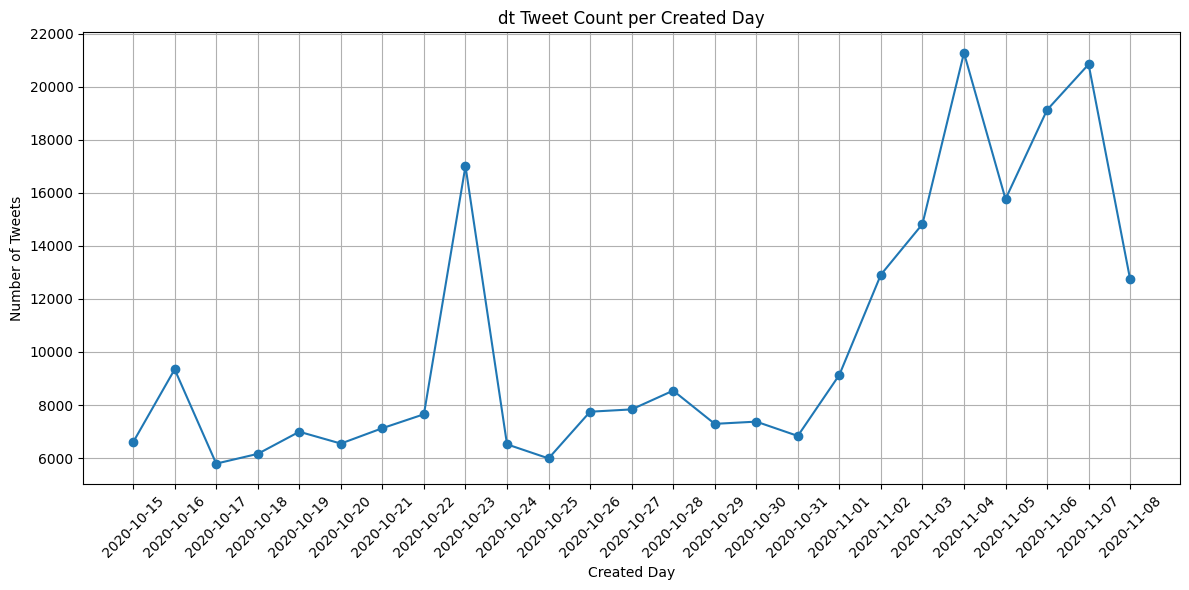

In [59]:
# dt Tweet Count per Created Day
plt.figure(figsize=(12, 6))

# Generate x-values as a range from 0 to the length of the data
x_values = range(len(dt_tweets_over_created_day))

plt.plot(x_values, dt_tweets_over_created_day.values, marker='o')
plt.title('dt Tweet Count per Created Day')
plt.xlabel('Created Day')
plt.ylabel('Number of Tweets')

# Set x-ticks to be the range of values and label them with the actual dates
plt.xticks(x_values, [date.strftime('%Y-%m-%d') for date in dt_tweets_over_created_day.index], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

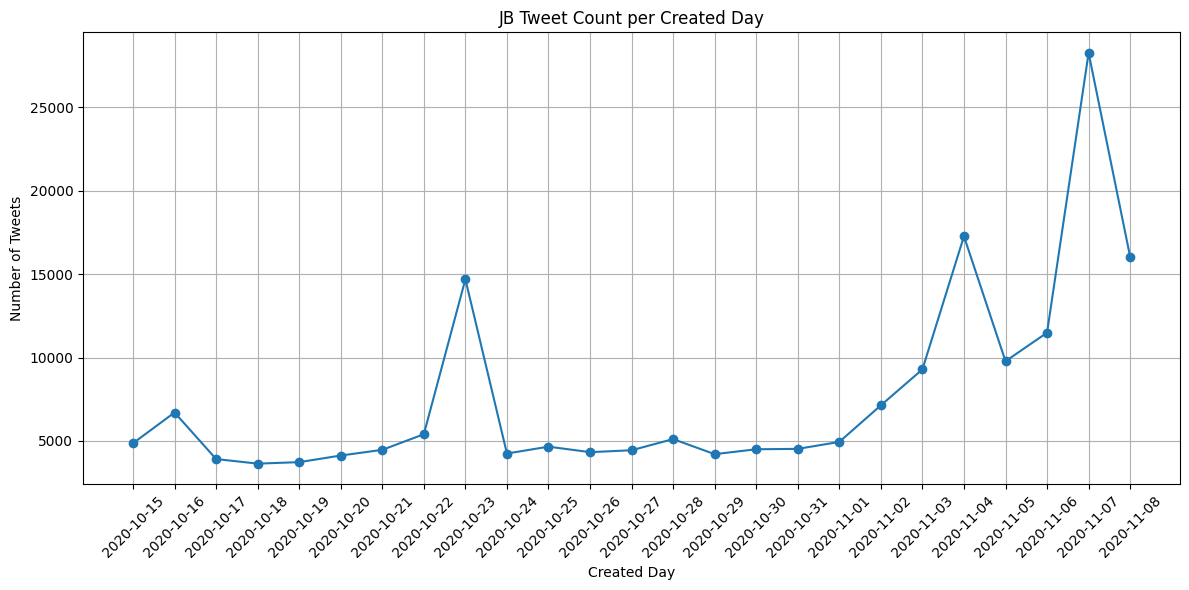

In [92]:
# Tweet Count per Created Day
plt.figure(figsize=(12, 6))

# Generate x-values as a range from 0 to the length of the data
x_values = range(len(tweets_over_created_day))

plt.plot(x_values, tweets_over_created_day.values, marker='o')
plt.title('JB Tweet Count per Created Day')
plt.xlabel('Created Day')
plt.ylabel('Number of Tweets')

# Set x-ticks to be the range of values and label them with the actual dates
plt.xticks(x_values, [date.strftime('%Y-%m-%d') for date in tweets_over_created_day.index], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


### Likes OverTime

In [60]:
likes_over_created_day = jb_Eng_top5.groupby('created_at')['likes'].sum()


In [62]:
dt_likes_over_created_day = dt_Eng_top5.groupby('created_at')['likes'].sum()

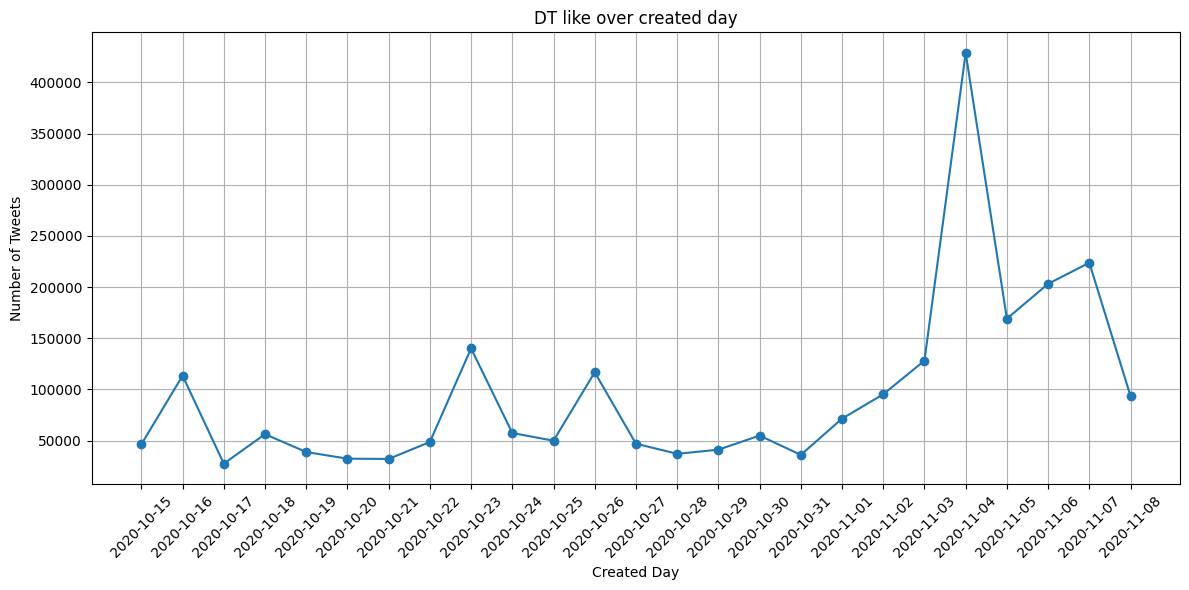

In [64]:
dt_likes_over_created_day.index = pd.to_datetime(dt_likes_over_created_day.index)


# Tweet Count per Created Day
plt.figure(figsize=(12, 6))

# Generate x-values as a range from 0 to the length of the data
x_values = range(len(dt_likes_over_created_day))

plt.plot(x_values, dt_likes_over_created_day.values, marker='o')
plt.title('DT like over created day')
plt.xlabel('Created Day')
plt.ylabel('Number of Tweets')

# Set x-ticks to be the range of values and label them with the actual dates
plt.xticks(x_values, [date.strftime('%Y-%m-%d') for date in dt_likes_over_created_day.index], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

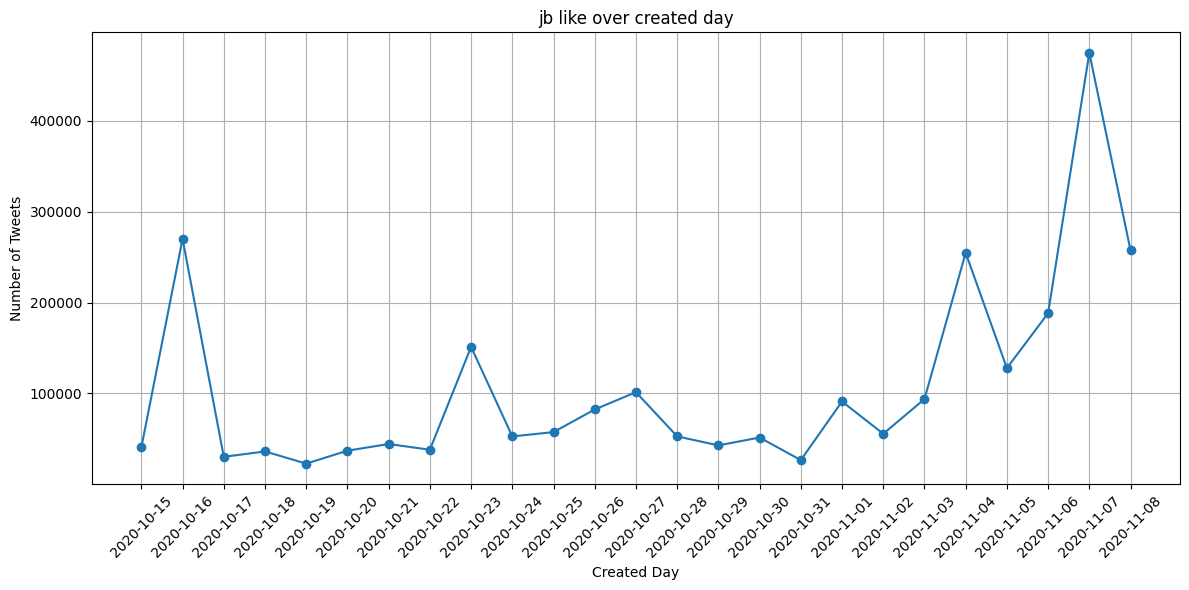

In [65]:
likes_over_created_day.index = pd.to_datetime(likes_over_created_day.index)


# Tweet Count per Created Day
plt.figure(figsize=(12, 6))

# Generate x-values as a range from 0 to the length of the data
x_values = range(len(likes_over_created_day))

plt.plot(x_values, likes_over_created_day.values, marker='o')
plt.title('jb like over created day')
plt.xlabel('Created Day')
plt.ylabel('Number of Tweets')

# Set x-ticks to be the range of values and label them with the actual dates
plt.xticks(x_values, [date.strftime('%Y-%m-%d') for date in likes_over_created_day.index], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


### Retweet Over Time

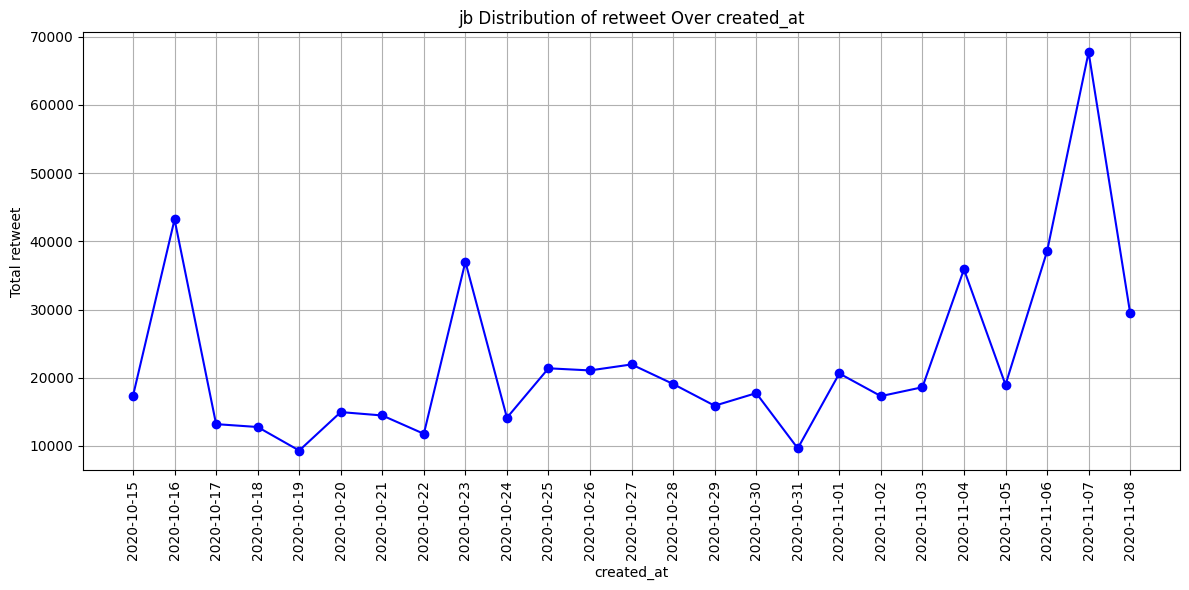

In [93]:
# Distribution of retweet Over created_at

plt.figure(figsize=(12, 6))

Reteet_over_created_day = jb_Eng_top5.groupby('created_at')['retweet_count'].sum()

plt.plot(Reteet_over_created_day, color='blue', marker='o')

# Add labels and title
plt.xlabel('created_at')
plt.ylabel('Total retweet')
plt.title('jb Distribution of retweet Over created_at')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks( Reteet_over_created_day.index.strftime('%Y-%m-%d'), rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()

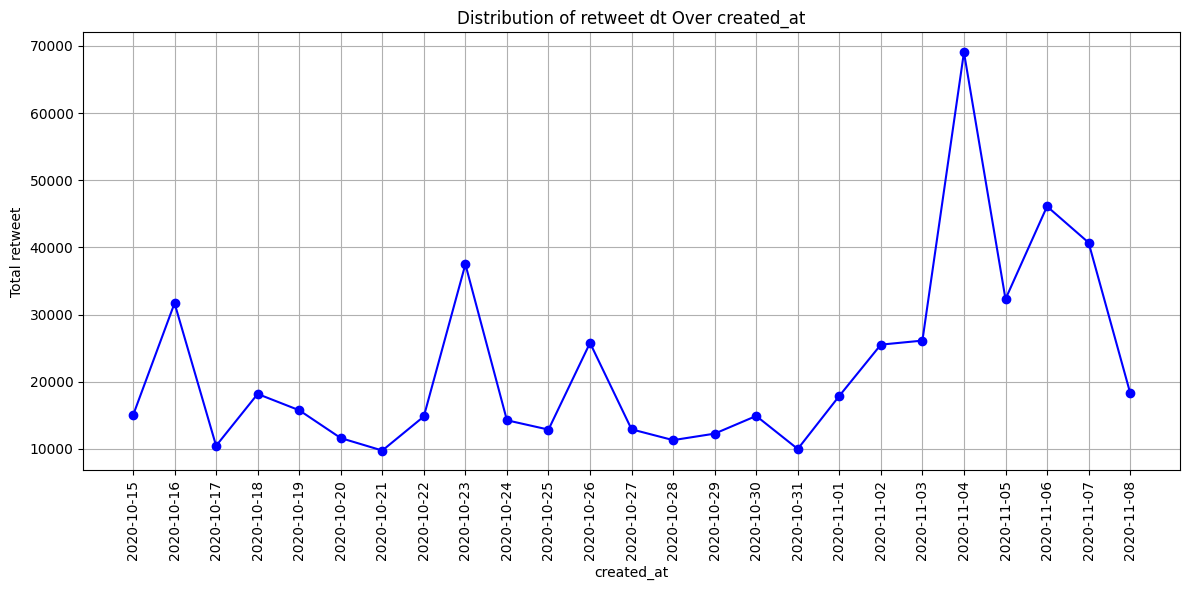

In [75]:
# Distribution of dt retweet Over created_at

plt.figure(figsize=(12, 6))

dt_Reteet_over_created_day = dt_Eng_top5.groupby('created_at')['retweet_count'].sum()

plt.plot(dt_Reteet_over_created_day, color='blue', marker='o')

# Add labels and title
plt.xlabel('created_at')
plt.ylabel('Total retweet')
plt.title('dt Distribution of retweet dt Over created_at')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks( dt_Reteet_over_created_day.index.strftime('%Y-%m-%d'), rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()

=====================================================================


- ### Teewt, Retweet, Likes over state

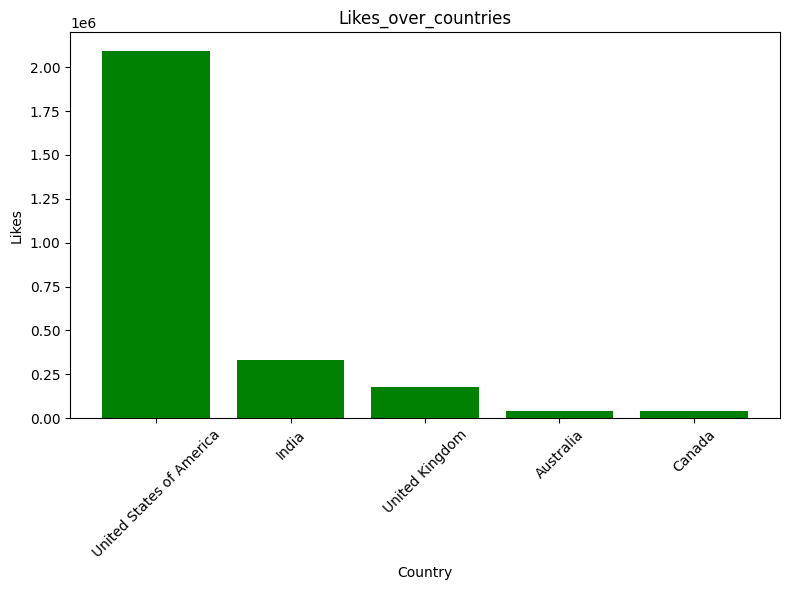

In [96]:
plt.figure(figsize=(8,6))

# Group by country, sum the likes, sort in descending order, and select the top 10
Likes_over_countries = jb_Eng_top5.groupby("country")["likes"].sum().sort_values(ascending=False)

# Create a bar plot for the top 10 countries
plt.bar(Likes_over_countries.index, Likes_over_countries, color='green')

plt.xlabel('Country')
plt.ylabel('Likes')
plt.title('jb Likes_over_countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better fit
plt.tight_layout()

plt.show()


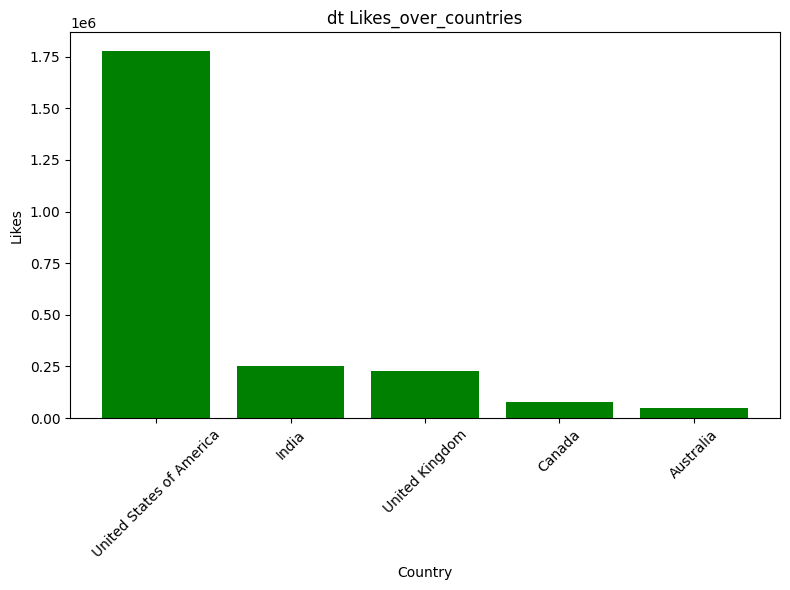

In [76]:
plt.figure(figsize=(8,6))

# Group by country, sum the likes, sort in descending order, and select the top 10
dt_Likes_over_countries = dt_Eng_top5.groupby("country")["likes"].sum().sort_values(ascending=False)

# Create a bar plot for the top 10 countries
plt.bar(dt_Likes_over_countries.index, dt_Likes_over_countries, color='green')

plt.xlabel('Country')
plt.ylabel('Likes')
plt.title('dt Likes_over_countries')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

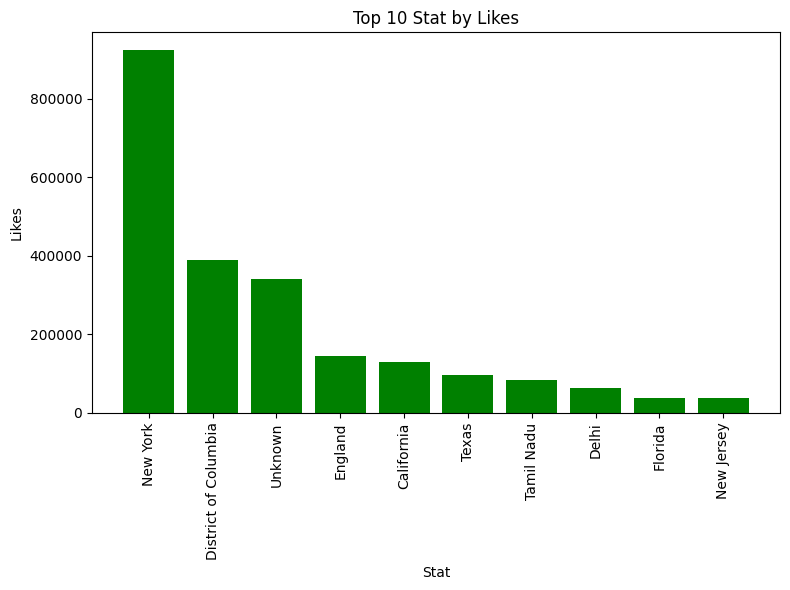

In [98]:
plt.figure(figsize=(8,6))

# Likes over top 10 state 
top_10_state = jb_Eng_top5.groupby("state")["likes"].sum().sort_values(ascending=False).head(10)


plt.bar(top_10_state.index, top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('Likes')
plt.title('Top 10 Stat by Likes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

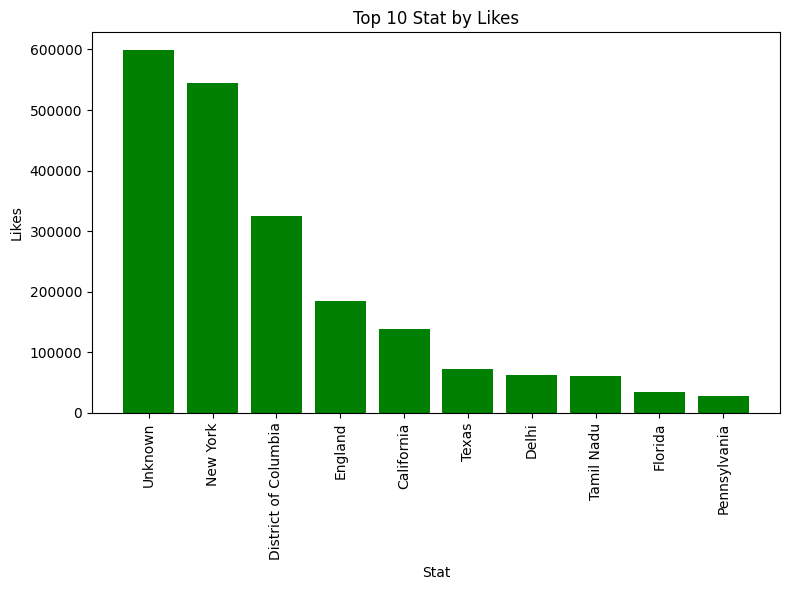

In [79]:
plt.figure(figsize=(8,6))

# Likes over top 10 state 
dt_top_10_state = dt_Eng_top5.groupby("state")["likes"].sum().sort_values(ascending=False).head(10)


plt.bar(dt_top_10_state.index, dt_top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('Likes')
plt.title('Top 10 Stat by Likes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

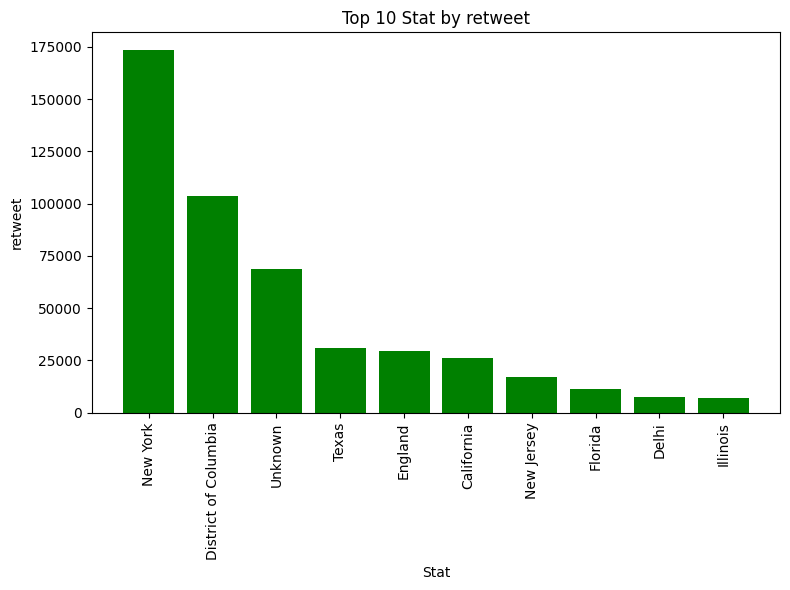

In [99]:
plt.figure(figsize=(8,6))

# retweet_count over top 10 state 
top_10_state = jb_Eng_top5.groupby("state")["retweet_count"].sum().sort_values(ascending=False).head(10)


plt.bar(top_10_state.index, top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('retweet')
plt.title('Top 10 Stat by retweet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

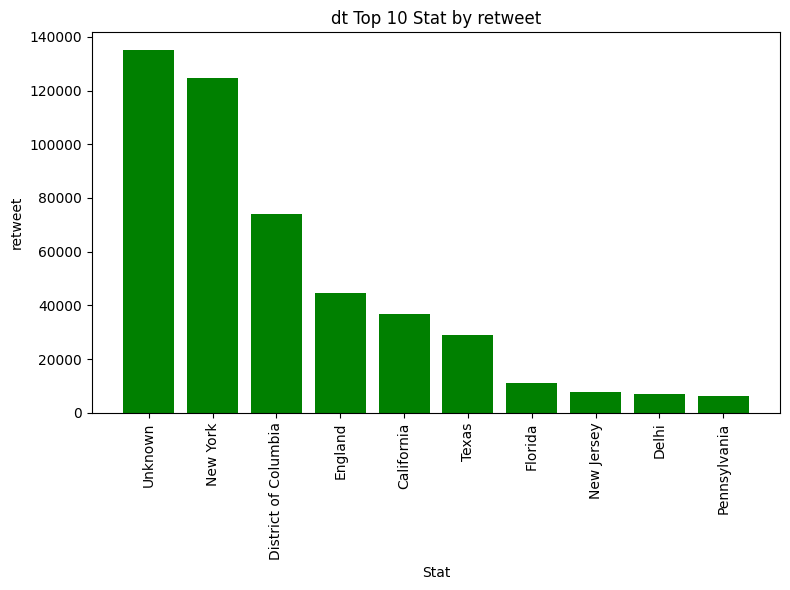

In [80]:
plt.figure(figsize=(8,6))

# retweet_count over top 10 state 
dt_top_10_state = dt_Eng_top5.groupby("state")["retweet_count"].sum().sort_values(ascending=False).head(10)


plt.bar(dt_top_10_state.index, dt_top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('retweet')
plt.title('dt Top 10 Stat by retweet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

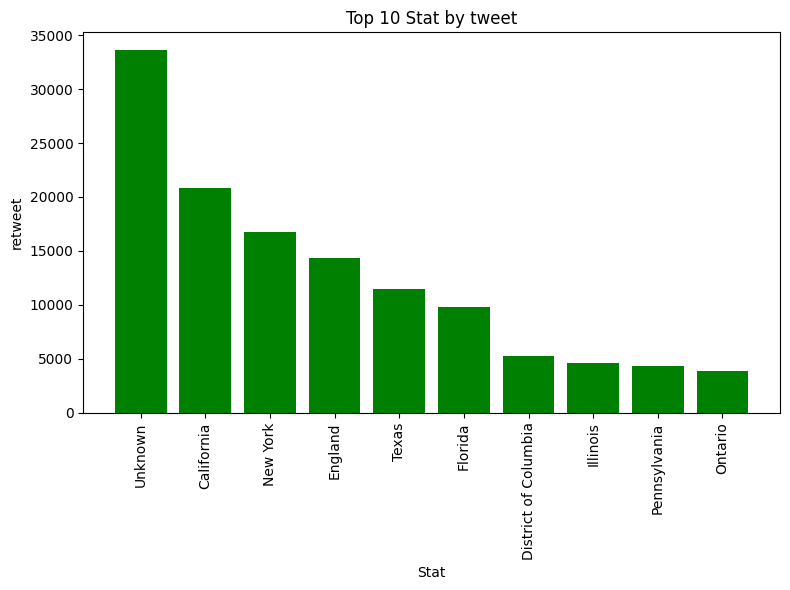

In [100]:
plt.figure(figsize=(8,6))

# tweet over top 10 state 
top_10_state = jb_Eng_top5.groupby("state")["tweet"].count().sort_values(ascending=False).head(10)


plt.bar(top_10_state.index, top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('retweet')
plt.title('Top 10 Stat by tweet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

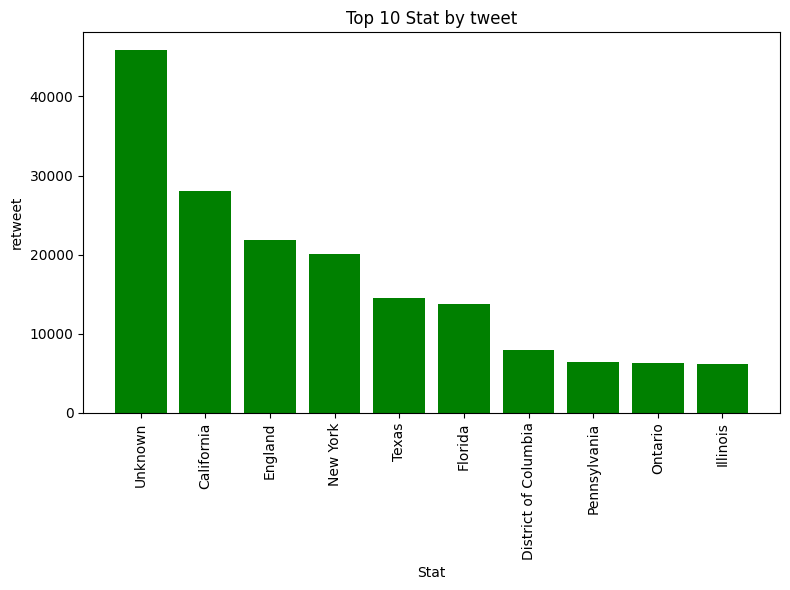

In [81]:
plt.figure(figsize=(8,6))

# tweet over top 10 state 
dt_top_10_state = dt_Eng_top5.groupby("state")["tweet"].count().sort_values(ascending=False).head(10)


plt.bar(dt_top_10_state.index, dt_top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('retweet')
plt.title('Top 10 Stat by tweet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

=====================================================================================

- ## Sentiment overtime 

In [101]:
import matplotlib.pyplot as plt


In [55]:
# creat sentiment_category_vader
jb_Eng_top5.loc[:, 'sentiment_category_vader_jb'] = jb_Eng_top5['sentiment_vader_jb'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1810418965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5.loc[:, 'sentiment_category_vader_jb'] = jb_Eng_top5['sentiment_vader_jb'].apply(


In [58]:
dt_Eng_top5.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'user_location_cleaned', 'emojis',
       'cleaned_tweet', 'language', 'sentiment_vader_dt',
       'dt_sentiment_category_vader_dt'],
      dtype='object')

In [57]:
# creat sentiment_category_vader
dt_Eng_top5.loc[:, 'dt_sentiment_category_vader_dt'] = dt_Eng_top5['sentiment_vader_dt'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\407974089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Eng_top5.loc[:, 'dt_sentiment_category_vader_dt'] = dt_Eng_top5['sentiment_vader_dt'].apply(


In [59]:
jb_Eng_top5.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'emojis', 'cleaned_tweet',
       'language', 'sentiment_vader_jb', 'sentiment_category_vader_jb'],
      dtype='object')

In [61]:
sentiment_vader_counts_us = jb_Eng_top5.groupby(['created_at', 'sentiment_category_vader_jb']).size().unstack(fill_value=0)


In [62]:
jb_Eng_top5['created_at'] = pd.to_datetime(jb['created_at'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_11808\1645247802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_Eng_top5['created_at'] = pd.to_datetime(jb['created_at'],errors='coerce')


In [115]:
jb_Eng_top5.dtypes

created_at                  datetime64[ns]
tweet                               object
likes                              float64
retweet_count                      float64
user_screen_name                    object
user_join_date              datetime64[ns]
user_followers_count               float64
user_location                       object
lat                                float64
long                               float64
city                                object
country                             object
state                               object
emojis                              object
cleaned_tweet                       object
language                            object
sentiment_vader                    float64
sentiment_category_vader            object
dtype: object

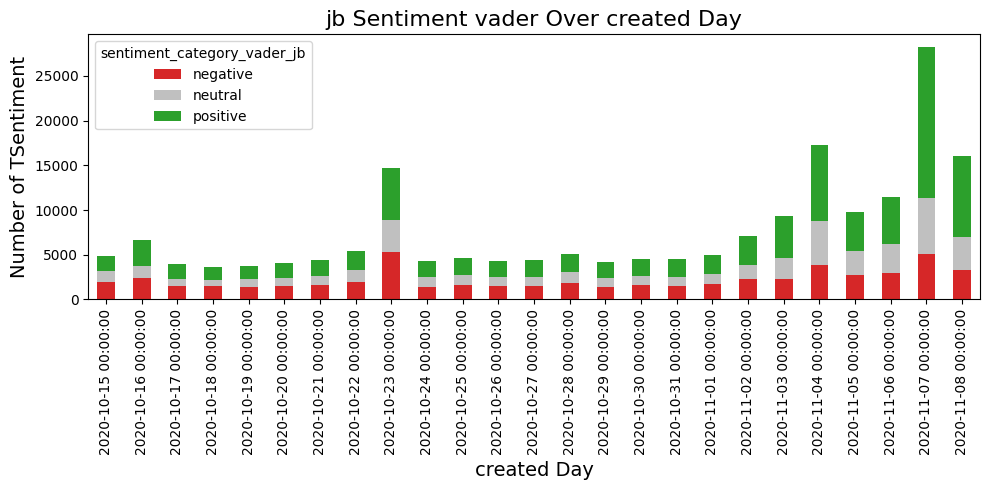

In [64]:
sentiment_vader_counts_us.plot(kind='bar', stacked=True, figsize=(10, 5), color=['tab:red','silver','tab:green'])

# Adding titles and labels
plt.title('jb Sentiment vader Over created Day', fontsize=16)
plt.xlabel('created Day', fontsize=14)
plt.ylabel('Number of TSentiment', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [65]:
dt_sentiment_vader_counts_us = dt_Eng_top5.groupby(['created_at', 'dt_sentiment_category_vader_dt']).size().unstack(fill_value=0)


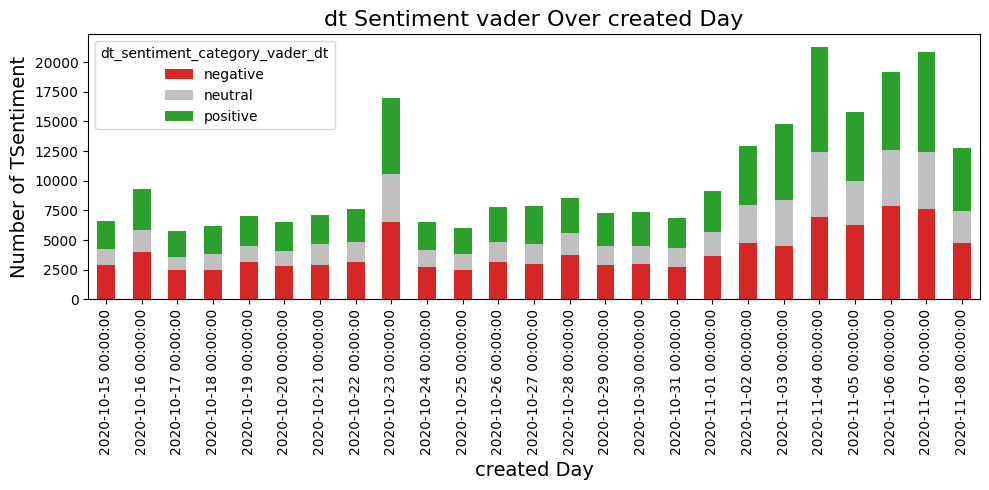

In [66]:
dt_sentiment_vader_counts_us.plot(kind='bar', stacked=True, figsize=(10, 5), color=['tab:red','silver','tab:green'])

# Adding titles and labels
plt.title('dt Sentiment vader Over created Day', fontsize=16)
plt.xlabel('created Day', fontsize=14)
plt.ylabel('Number of TSentiment', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [69]:

jb_Eng_top5['sentiment_category_vader_jb'].value_counts()

sentiment_category_vader_jb
positive    89876
negative    55743
neutral     46151
Name: count, dtype: int64

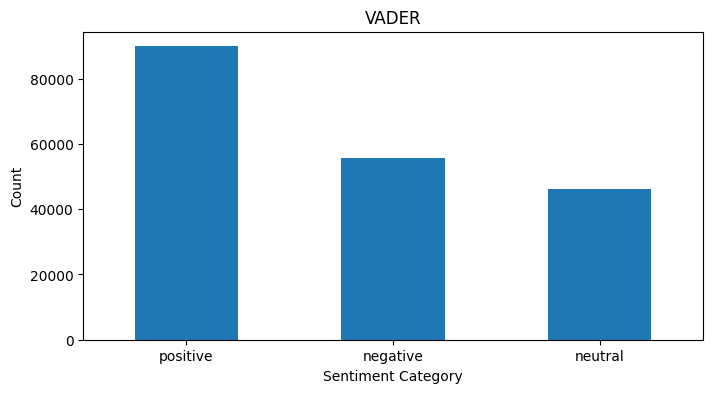

In [70]:
vader_counts = jb_Eng_top5['sentiment_category_vader_jb'].value_counts()


# Plotting the comparison
vader_counts.plot(kind='bar', figsize=(8, 4))
plt.title('VADER')
plt.ylabel('Count')
plt.xlabel('Sentiment Category')
plt.xticks(rotation=0)
plt.show()

=================================================================================

In [476]:
# import os

# # Create the directory if it doesn't exist
# directory = "C:\\Users\\louay\\OneDrive\\Desktop\\Twitter Election Data Analysis\\Election dataset"
# os.makedirs(directory, exist_ok=True)

# # Save the cleaned DataFrame to a new file
# jb_1_lang.to_csv(f"{directory}\\jb_1_en_sent3.csv", index=False)